<a href="https://colab.research.google.com/github/Zen0007/classification_analysis_text/blob/main/rnn_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
!pip install tensorflow

In [132]:
import numpy as np
from tensorflow. keras.models import Sequential
from tensorflow. keras.layers import Dense, Embedding , LSTM, Dropout
from tensorflow. keras.preprocessing.text import Tokenizer
from tensorflow. keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [217]:
comment = ["Produk ini sangat bagus! Kualitasnya terjamin dan sangat memuaskan.",
           "Saya kecewa dengan produk ini. Kualitasnya buruk dan tidak sesuai dengan harapan.",
          "Pelayanan pelanggan mereka luar biasa! Sangat ramah dan responsif.",
          "Pelayanan pelanggan yang buruk! Sulit untuk mendapatkan bantuan dan respon yang lambat.",
          "Harga produk ini sangat terjangkau! Nilainya jauh melebihi harganya.",
          "Pelayanan yang diberikan sangat buruk, sangat lambat dalam menanggapi keluhan pelanggan.",
          "Pelayanan pelanggan mereka sangat responsif dan membantu, cepat dalam menyelesaikan masalah.",
          "Saya sangat kecewa dengan produk ini, tidak sesuai dengan deskripsi yang diberikan.",
          "Saya sangat puas dengan kualitas produk ini, sangat worth it dengan harga yang dibayarkan.",
          "Pengiriman barang terlalu lama, tidak bisa mengandalkan layanan ini."

            ]
comments = comment*8



In [218]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1,0])

result_length = 8* len(array)

ratting= np.zeros(result_length)
ratting[::2] = 1



In [219]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(comments)

In [220]:
sequences = tokenizer.texts_to_sequences(comments)

In [221]:
max_length = max([len(seq) for seq in sequences])

In [222]:
padded_sequences = pad_sequences(sequences, maxlen=max_length )

In [223]:
labels = to_categorical(ratting)

In [224]:
input_dim = len(tokenizer.word_index)+1

In [244]:
x_train,x_test,y_train,y_test = train_test_split(padded_sequences,labels,test_size=0.5,random_state=42)

In [266]:
model = Sequential()
model.add(Embedding(input_dim=input_dim, output_dim=32, input_length=max_length))
model.add(LSTM(20, dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(12 ,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(2,activation='softmax'))

In [267]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [320]:
hist=model.fit(x_train, y_train, epochs=20,verbose=0, batch_size=16 ,validation_split=0.3)

In [321]:
loss , accuracy = model.evaluate(x_test, y_test)

print(f"loss :{loss}")
print(f"accuracy :{accuracy }")

2/2 [==============================] - 0s 10ms/step - loss: 0.3117 - accuracy: 0.8500
loss :0.3116828501224518
accuracy :0.8500000238418579


In [125]:
import matplotlib.pyplot as plt

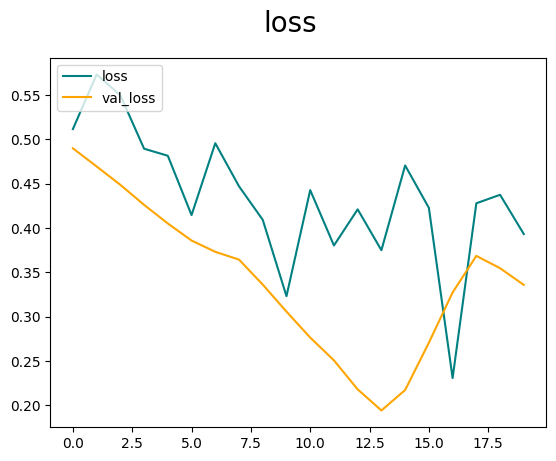

In [322]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

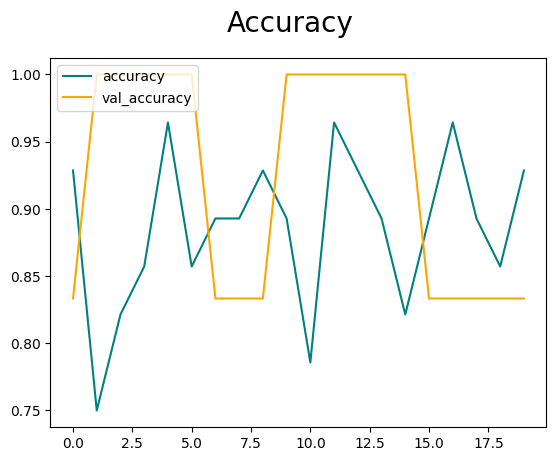

In [323]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [315]:
new_comments = ["Pelayanan pelanggan mereka sangat responsif dan membantu, cepat dalam menyelesaikan masalah.",
                "Produk ini sangat buruk kualitasnya, tidak sebanding dengan harganya.",
                 "Saya sangat puas dengan kualitas produk ini, sangat worth it dengan harga yang dibayarkan.",
                "Sistem pembayaran mereka sangat rumit dan membingungkan.",
              ]

In [316]:
new_sequences = tokenizer.texts_to_sequences(new_comments)
new_padded_sequences = pad_sequences(new_sequences,maxlen=max_length,padding='post')
result = model.predict(new_padded_sequences)

1/1 [==============================] - 0s 32ms/step


In [317]:
predictions = model.predict(new_padded_sequences)
predictions_labels = np.argmax(predictions,axis=1)
print(predictions)
original_labels = ['positif' if label   > 0.5  else 'negatif' for label in predictions_labels]

for comments,label in zip(new_comments,original_labels):
  print(f"komentar:{comments} ")
  print(f"label: {label}")
  print()


1/1 [==============================] - 0s 37ms/step
[[0.30724147 0.6927585 ]
 [0.68198234 0.3180177 ]
 [0.2819345  0.71806544]
 [0.5610399  0.43896008]]
komentar:Pelayanan pelanggan mereka sangat responsif dan membantu, cepat dalam menyelesaikan masalah. 
label: positif

komentar:Produk ini sangat buruk kualitasnya, tidak sebanding dengan harganya. 
label: negatif

komentar:Saya sangat puas dengan kualitas produk ini, sangat worth it dengan harga yang dibayarkan. 
label: positif

komentar:Sistem pembayaran mereka sangat rumit dan membingungkan. 
label: negatif

